In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('potreb.csv')
df.head()

,Код заявки,Дата выдачи,Возраст,Заемщик.Пол,СемейноеПоложение,Иждивенцы,Образование,Вид деятельности,Стаж,Стаж общий,Белый доход,"Месячный доход, руб.","Сумма кредита, тыс. руб.","Месячный платеж, руб.",Просрочек свыше 60 дн.
0,1,2/23/2005,33,Ж,Холост (незамужем),3 и более,Среднее,Наемный работник,От 3 до 5 лет,Свыше 5 лет,нет,11522,104,3671,0
1,2,2/27/2005,33,М,Холост (незамужем),0,Среднее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,да,1131,178,6274,0
2,3,2/28/2005,54,М,Женат (замужем),0,Высшее,Наемный работник,менее 1 года,Свыше 5 лет,нет,7453,68,2346,0
3,4,2/28/2005,30,М,Женат (замужем),1-2,Высшее,Наемный работник,От 3 до 5 лет,Свыше 5 лет,да,14897,109,3902,0
4,5,2/28/2005,22,М,Холост (незамужем),0,Среднее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,да,1191,78,2788,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
Код заявки                  1068 non-null int64
Дата выдачи                 1068 non-null object
Возраст                     1068 non-null int64
Заемщик.Пол                 1068 non-null object
СемейноеПоложение           1068 non-null object
Иждивенцы                   1068 non-null object
Образование                 1068 non-null object
Вид деятельности            1068 non-null object
Стаж                        1068 non-null object
Стаж общий                  1068 non-null object
Белый доход                 1068 non-null object
Месячный доход, руб.        1068 non-null int64
Сумма кредита, тыс. руб.    1068 non-null int64
Месячный платеж, руб.       1068 non-null int64
Просрочек свыше 60 дн.      1068 non-null int64
dtypes: int64(6), object(9)
memory usage: 125.2+ KB


In [4]:
target = df['Сумма кредита, тыс. руб.']
target.value_counts().head(4)

257    20
146    18
171    17
154    16
Name: Сумма кредита, тыс. руб., dtype: int64

In [5]:
df['Иждивенцы'].value_counts()

1-2          567
0            476
3 и более     25
Name: Иждивенцы, dtype: int64

In [6]:
X = df.drop(['Дата выдачи', 'Код заявки', 'Сумма кредита, тыс. руб.'], axis=1)
real_vars = [var for var in X.columns if X[var].unique().size > 3]
real_vars
X = pd.get_dummies(X)
MEANS, VARS, SUPS = X.mean(), X.std(), X.max()
X = X.div(SUPS)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 26 columns):
Возраст                                 1068 non-null float64
Месячный доход, руб.                    1068 non-null float64
Месячный платеж, руб.                   1068 non-null float64
Просрочек свыше 60 дн.                  1068 non-null float64
Заемщик.Пол_Ж                           1068 non-null float64
Заемщик.Пол_М                           1068 non-null float64
СемейноеПоложение_Другое                1068 non-null float64
СемейноеПоложение_Женат (замужем)       1068 non-null float64
СемейноеПоложение_Холост (незамужем)    1068 non-null float64
Иждивенцы_0                             1068 non-null float64
Иждивенцы_1-2                           1068 non-null float64
Иждивенцы_3 и более                     1068 non-null float64
Образование_Высшее                      1068 non-null float64
Образование_Среднее                     1068 non-null float64
Вид деятельности_Наемный 

In [7]:
real_vars

['Возраст',
 'Стаж',
 'Стаж общий',
 'Месячный доход, руб.',
 'Месячный платеж, руб.']

In [8]:
from sklearn.feature_selection import mutual_info_regression, f_regression

In [9]:
Xmutinf = pd.DataFrame({'var':X.columns, 'mutual': mutual_info_regression(X, target)}).sort_values('mutual', ascending=False)
Xmutinf

/home/worker/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,mutual,var
2,2.346679,"Месячный платеж, руб."
1,0.242722,"Месячный доход, руб."
14,0.038218,Вид деятельности_Наемный работник
3,0.037674,Просрочек свыше 60 дн.
19,0.024700,Стаж_менее 1 года
15,0.021240,Вид деятельности_Собственное дело
16,0.020897,Стаж_От 1 до 3 лет
8,0.011421,СемейноеПоложение_Холост (незамужем)
12,0.009099,Образование_Высшее
25,0.006817,Белый доход_нет


In [10]:
Xcoef = pd.DataFrame(np.c_[(X.columns, *f_regression(X, target))], columns=['var', 'coef', 'p']).sort_values('p')
Xcoef

,var,coef,p
2,"Месячный платеж, руб.",1991.63,3.67624e-246
1,"Месячный доход, руб.",325.906,8.96037e-64
14,Вид деятельности_Наемный работник,23.56,1.39142e-06
15,Вид деятельности_Собственное дело,23.56,1.39142e-06
3,Просрочек свыше 60 дн.,22.6795,2.1782e-06
4,Заемщик.Пол_Ж,15.2113,0.000102142
5,Заемщик.Пол_М,15.2113,0.000102142
24,Белый доход_да,12.1888,0.000500444
25,Белый доход_нет,12.1888,0.000500444
13,Образование_Среднее,9.78494,0.0018072


In [11]:
best_feats = set(Xmutinf.loc[Xmutinf.mutual > 1e-3, 'var']).union(set(Xcoef.loc[Xcoef.p < .05, 'var']))
best_feats

{'Белый доход_да',
 'Белый доход_нет',
 'Вид деятельности_Наемный работник',
 'Вид деятельности_Собственное дело',
 'Заемщик.Пол_Ж',
 'Заемщик.Пол_М',
 'Иждивенцы_3 и более',
 'Месячный доход, руб.',
 'Месячный платеж, руб.',
 'Образование_Высшее',
 'Образование_Среднее',
 'Просрочек свыше 60 дн.',
 'СемейноеПоложение_Другое',
 'СемейноеПоложение_Холост (незамужем)',
 'Стаж_От 1 до 3 лет',
 'Стаж_менее 1 года'}

In [12]:
Xtr, Xte, ytr, yte = sklearn.model_selection.train_test_split(X, target, test_size=.32)

In [13]:
from sklearn import tree, metrics

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
clf = GridSearchCV(
    tree.DecisionTreeRegressor(),
    [dict(
        criterion = ['mse', 'friedman_mse', 'mae'],
        max_depth = [2, 3, 4, 5, 6, 7, 8, 16],
    )],
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2', 'explained_variance'],
    refit='explained_variance',
    return_train_score=True
).fit(Xtr, ytr)
clf.best_params_

{'criterion': 'mse', 'max_depth': 3}

In [16]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,mean_score_time,mean_test_explained_variance,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_r2,mean_train_explained_variance,mean_train_neg_mean_absolute_error,mean_train_neg_mean_squared_error,mean_train_r2,...,std_fit_time,std_score_time,std_test_explained_variance,std_test_neg_mean_absolute_error,std_test_neg_mean_squared_error,std_test_r2,std_train_explained_variance,std_train_neg_mean_absolute_error,std_train_neg_mean_squared_error,std_train_r2
0,0.001504,0.000938,0.655935,-28.623211,-1256.252659,0.654102,0.686579,-26.983042,-1138.832105,0.686579,...,0.000196,0.000094,0.005802,0.881125,76.268949,0.004787,0.004844,0.313628,35.957528,0.004844
1,0.001494,0.000845,0.691141,-27.929839,-1127.974050,0.689414,0.730151,-25.656936,-980.602984,0.730151,...,0.000036,0.000009,0.003220,0.620713,65.836084,0.001823,0.002636,0.481995,31.616171,0.002636
2,0.001671,0.000961,0.686412,-27.406044,-1144.418812,0.684450,0.756614,-23.618746,-884.535536,0.756614,...,0.000082,0.000146,0.011073,0.313270,51.923754,0.012082,0.003794,1.000928,33.048352,0.003794
3,0.001895,0.000892,0.672382,-27.299120,-1194.136491,0.670928,0.788371,-21.230575,-769.447881,0.788371,...,0.000158,0.000062,0.014701,0.811880,72.913990,0.014529,0.005186,0.832978,39.251200,0.005186
4,0.002285,0.001064,0.632393,-28.151759,-1341.931248,0.630658,0.824447,-18.608268,-638.309025,0.824447,...,0.000100,0.000117,0.010246,1.298254,95.274269,0.009638,0.005686,0.958688,35.485294,0.005686
5,0.002536,0.000991,0.600138,-28.453147,-1461.692373,0.597669,0.864026,-15.025230,-494.306036,0.864026,...,0.000327,0.000030,0.016335,1.632425,110.728822,0.015450,0.003910,0.677880,24.694603,0.003910
6,0.002815,0.001077,0.567142,-29.059245,-1587.426080,0.564585,0.899920,-11.594267,-363.904314,0.899920,...,0.000446,0.000165,0.036455,1.926941,212.923107,0.034755,0.003367,0.315773,20.748924,0.003367
7,0.003680,0.001058,0.442268,-31.680277,-2038.868840,0.439810,0.999194,-0.199528,-2.842008,0.999194,...,0.000583,0.000055,0.027966,1.602327,205.389994,0.026303,0.000993,0.182712,3.473138,0.000993
8,0.001771,0.000974,0.655935,-28.623211,-1256.252659,0.654102,0.686579,-26.983042,-1138.832105,0.686579,...,0.000327,0.000014,0.005802,0.881125,76.268949,0.004787,0.004844,0.313628,35.957528,0.004844
9,0.001769,0.001106,0.691141,-27.929839,-1127.974050,0.689414,0.730151,-25.656936,-980.602984,0.730151,...,0.000117,0.000148,0.003220,0.620713,65.836084,0.001823,0.002636,0.481995,31.616171,0.002636


In [17]:
sklearn.metrics.explained_variance_score(yte, clf.predict(Xte))

0.68679252604201091

In [18]:
sklearn.metrics.mean_absolute_error(yte, clf.predict(Xte))

26.01572823023611

In [19]:
import graphviz

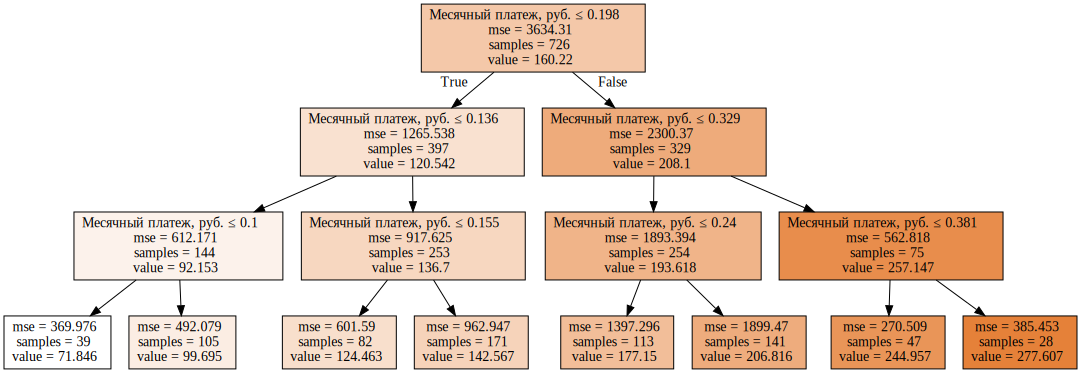

In [20]:
clfdot = tree.export_graphviz(
    clf.best_estimator_,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    special_characters=True
)
graphviz.Source(clfdot)